C:\Users\fpenaherrera_vaca\AppData\Local\Temp\ipykernel_18324\2509295339.py:89: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('GnBu_r')
C:\Users\fpenaherrera_vaca\AppData\Local\Temp\ipykernel_18324\2509295339.py:89: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('GnBu_r')
C:\Users\fpenaherrera_vaca\AppData\Local\Temp\ipykernel_18324\2509295339.py:89: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('GnBu_r')
C:\U

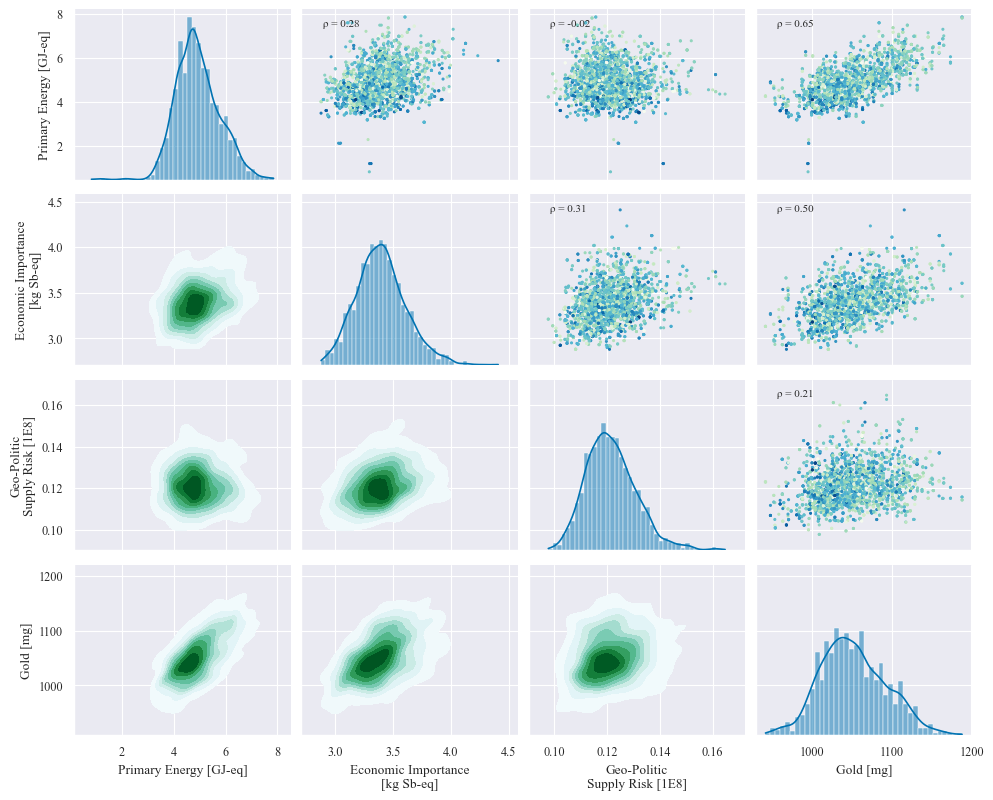

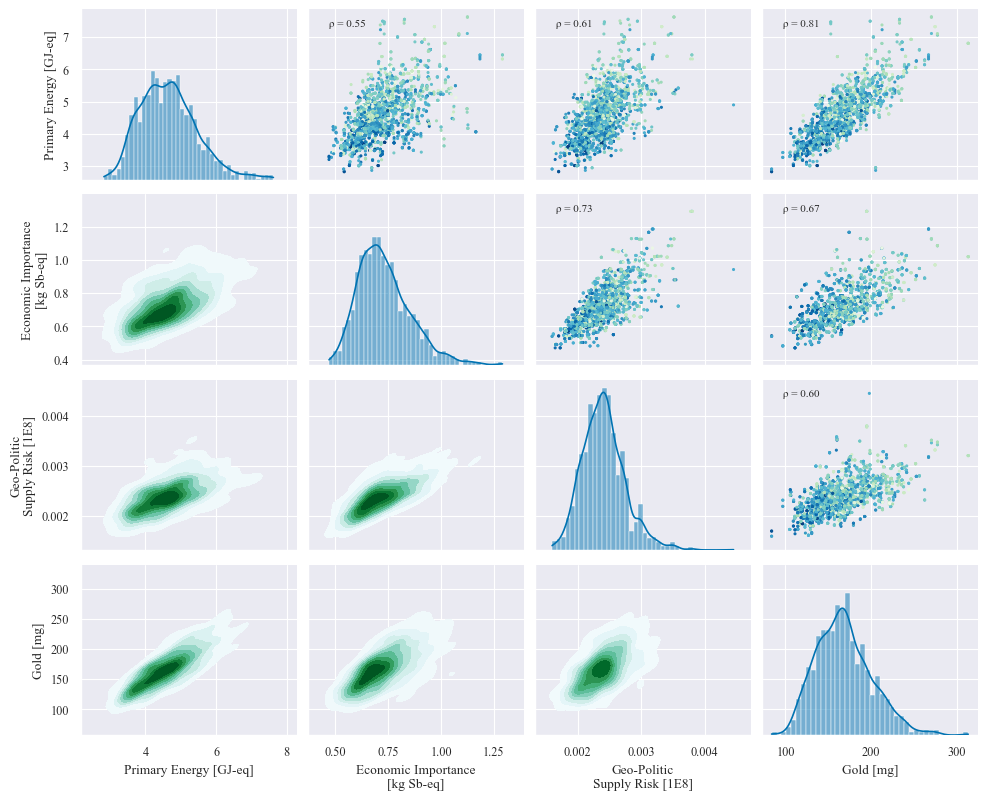

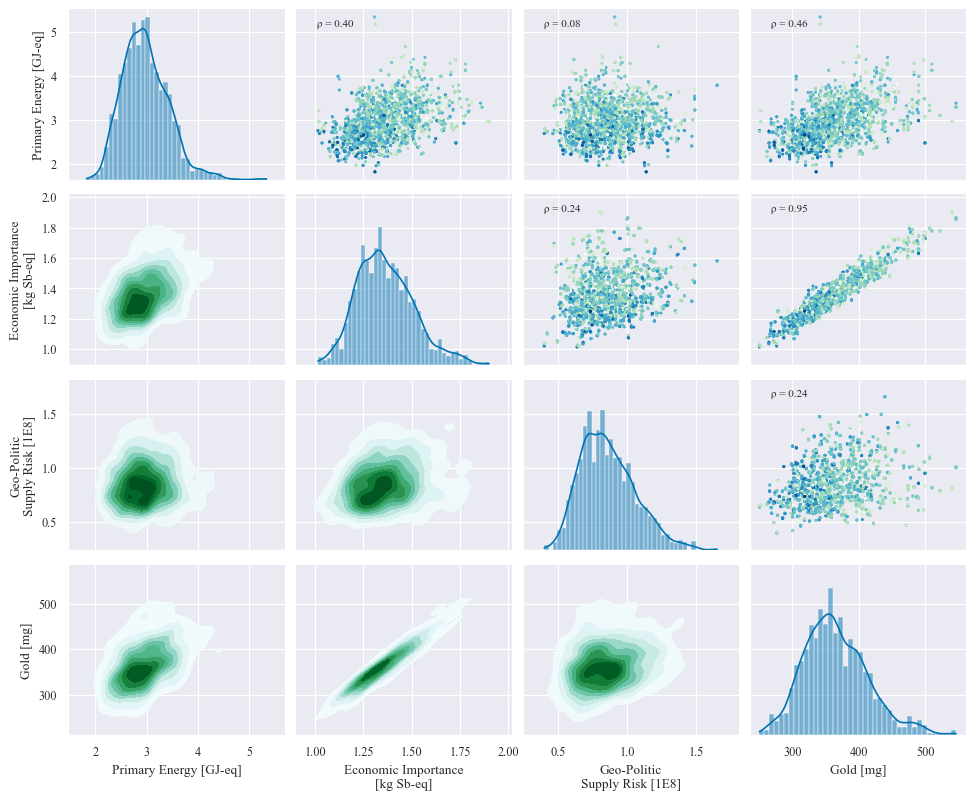

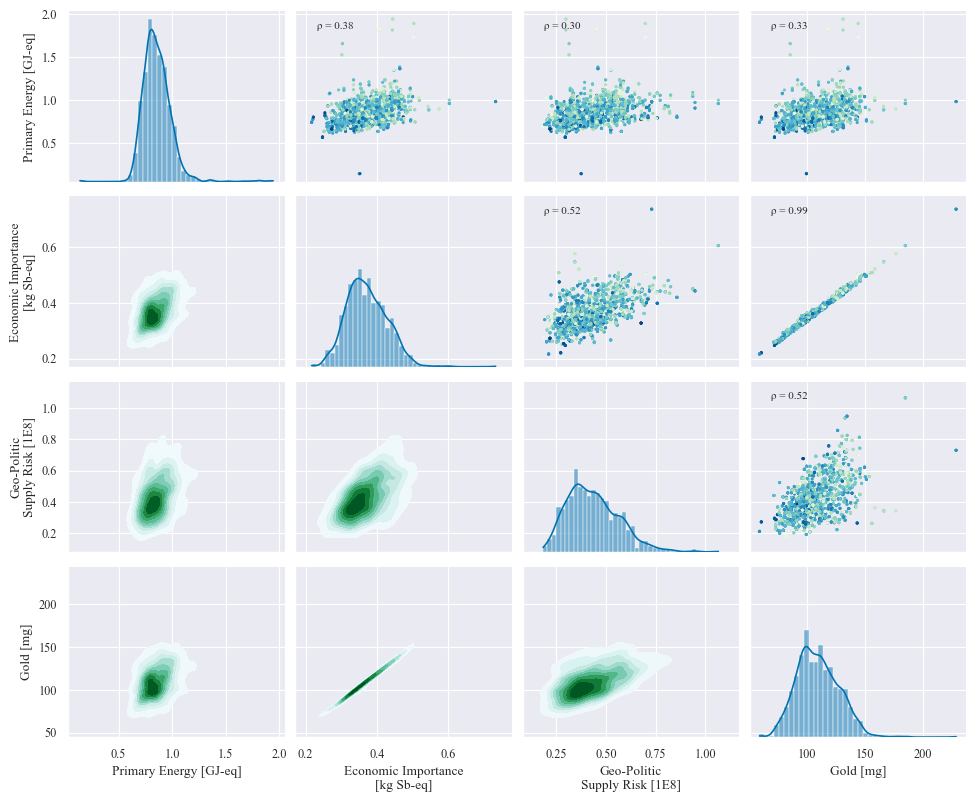

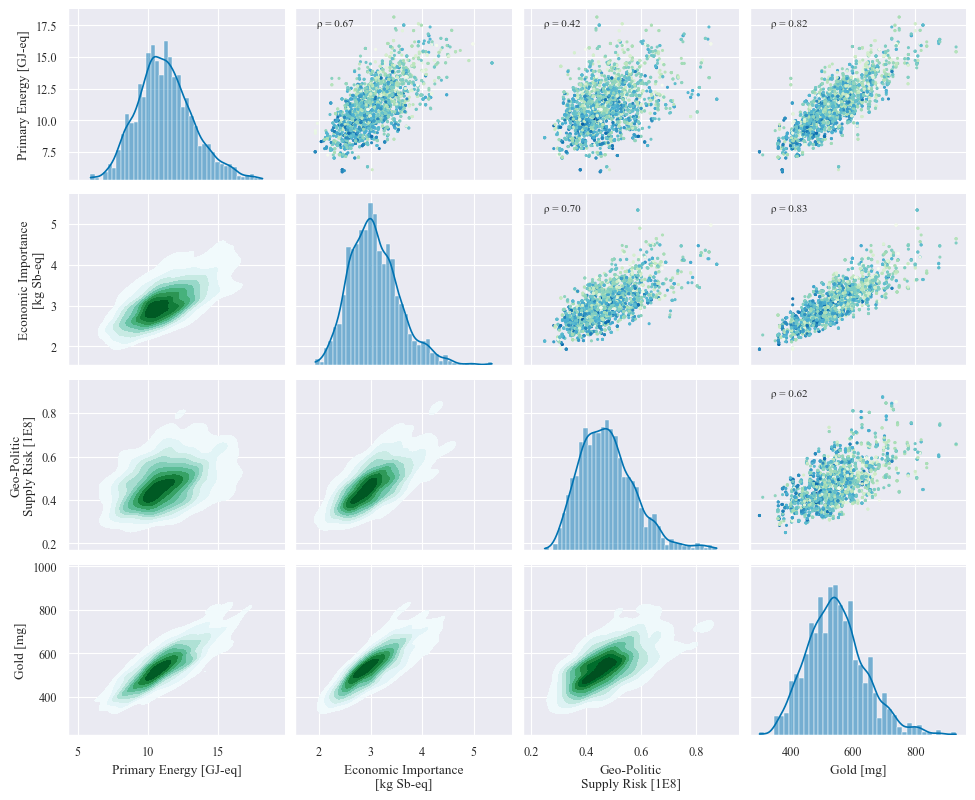

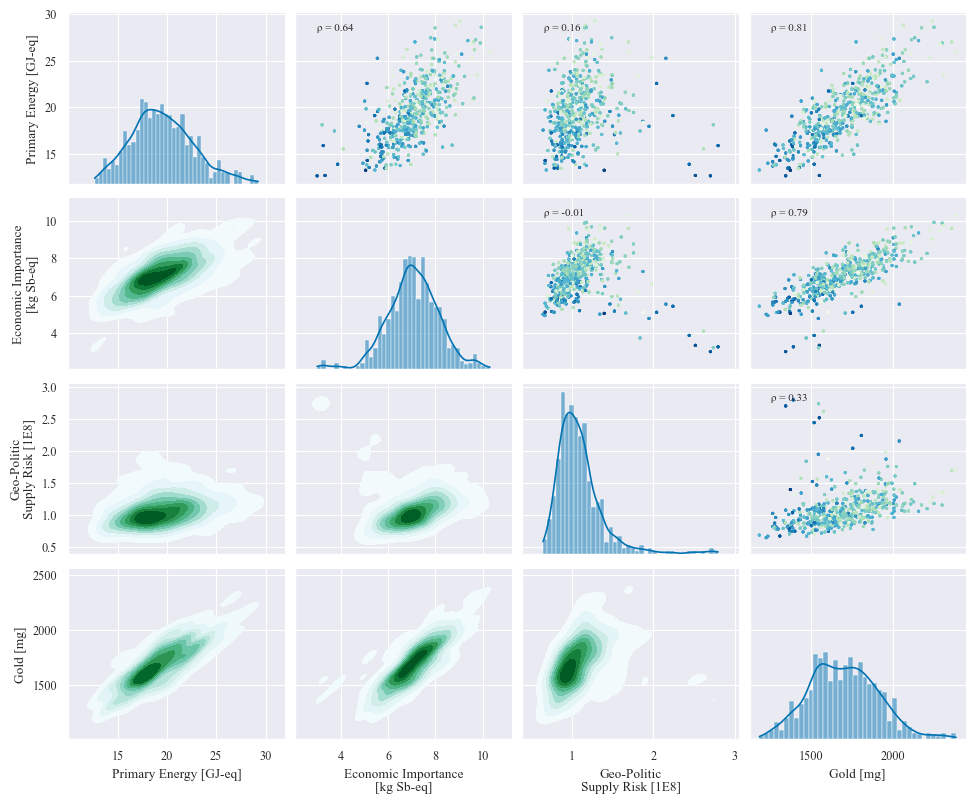

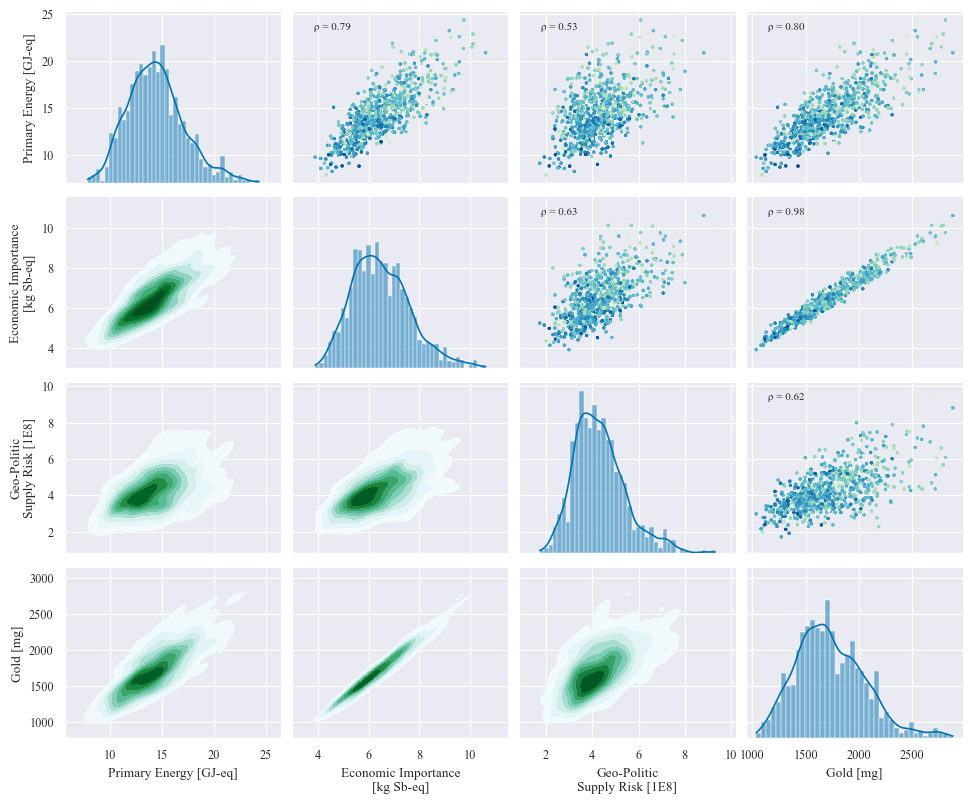

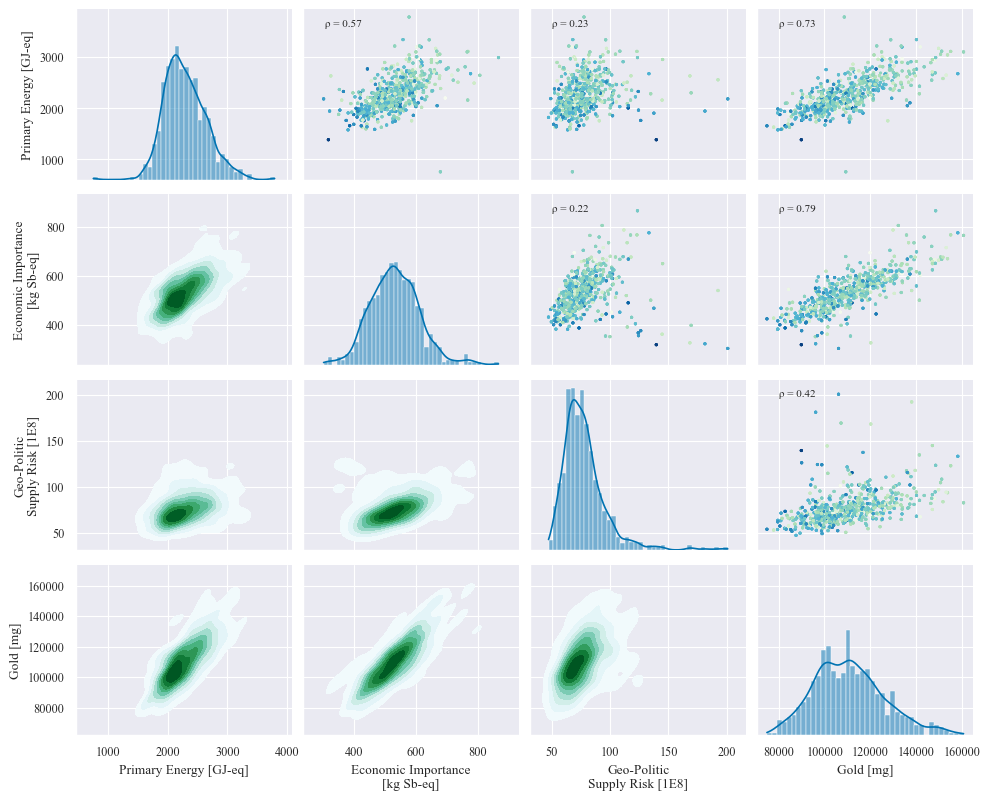

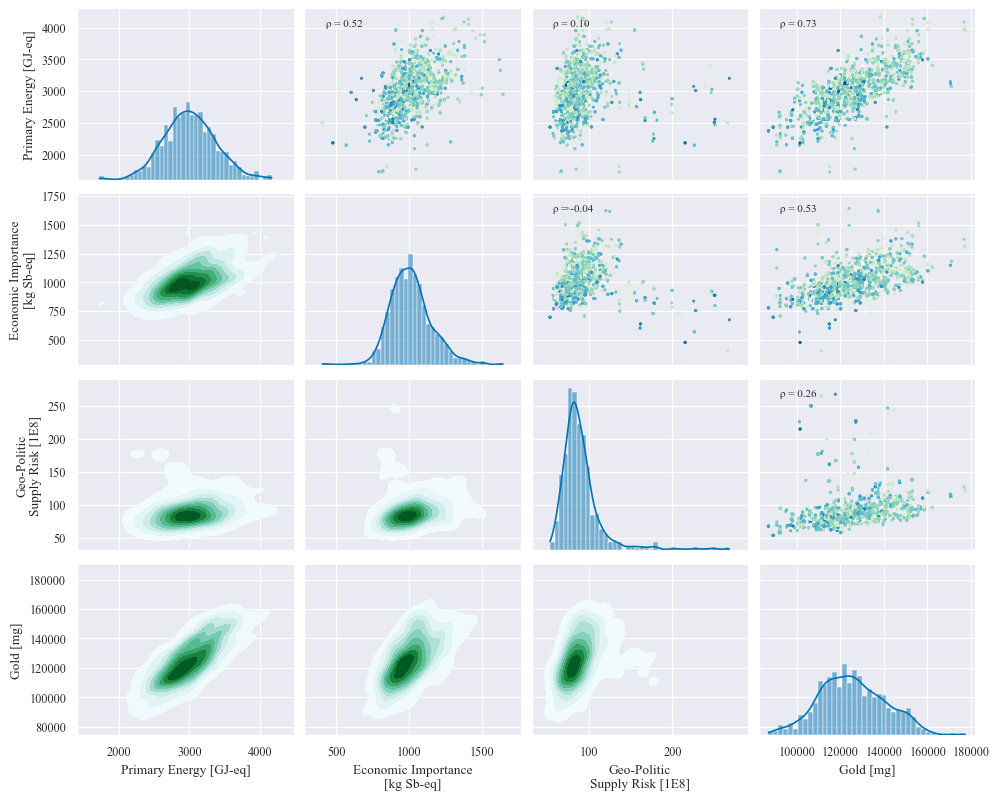

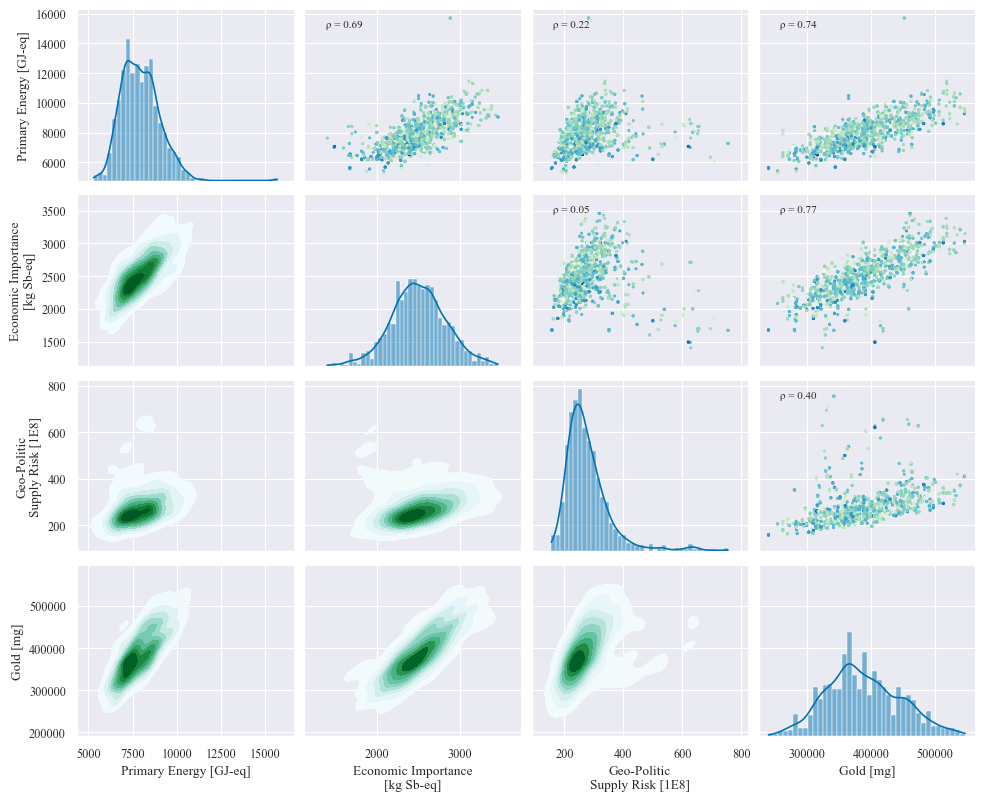

In [56]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import copy
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pandas

ps_list = [
    "3204-CPU, mounted mainboard",
    "3208-Mainboard",
    "3211-PCB mounted mainboard",
    "3219-PCB, for power supply unit",
    "4440-Server, 1U, no storage",
    "4443-Server, 2U, storage",
    "4455-Blade (Ref. Unit)",
    "5101-KDO-IT",
    # "5201-KDO-Climatization",
    #"5301-KDO-Energy Supply",
    # "5401-KDO-Infrastructure",
    "6001-KDO",
    "6003-RZ1"
]

FONTSIZE = 8


def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes,
                fontsize=FONTSIZE, font="Times New Roman")


for ps_name in ps_list:
    corr = "data/MC_TEMPRO_DB220425_{}_{}.csv".format("Corr", ps_name)

    cols = {
        # "CML-climate change (GWP 100a)": "Green House Emissions",
        "CED - total": "Primary Energy [GJ-eq]",
        # "ADP-Minerals- Total": "Depletion of Minerals",
        "EI-Minerals- Total": "Economic Importance\n[kg Sb-eq]",
        # "SR-Minerals- Total": "Supply Risk",
        "GPR-Minerals- Total": "Geo-Politic\nSupply Risk [1E8]",
        "EDIP-Gold": "Gold [mg]",
        # "EDIP-Copper": "Copper",
        # "EcoIndicator 99 (E - E) - total":"Total Impacts",
        "ReCiPe Endpoint (E - A) - total (total)": "Total",
    }

    col_size = "Total"

    df = pd.read_csv(corr)
    df = df[list(cols.keys())]
    for c in list(df.columns):
        df = df[df[c] > 0]

    df = df[df["CED - total"] < 2.5*df["CED - total"].mean()]
    df = df[df["GPR-Minerals- Total"] < 2.5*df["GPR-Minerals- Total"].mean()]
    df = df[df["ReCiPe Endpoint (E - A) - total (total)"] <
            2.5*df["ReCiPe Endpoint (E - A) - total (total)"].mean()]

    df.rename(columns=cols, inplace=True)
    df["Primary Energy [GJ-eq]"] = df["Primary Energy [GJ-eq]"]*1e-3
    df["Gold [mg]"] = df["Gold [mg]"]*1e6
    df["Geo-Politic\nSupply Risk [1E8]"] *= 1e-8
    sizes_ = df[col_size]
    columns = [c for c in df.columns if c != col_size]

    df = df[columns]

    sns.set(context="paper", palette="colorblind",
            style="darkgrid", font_scale=1, font="Times New Roman")
    grid = sns.PairGrid(data=df)

    grid.fig.set_size_inches(10, 8)
    import numpy as np
    if True:
        values = np.log(sizes_)

        # normalize the values to [0, 1]
        norm = plt.Normalize(min(values), max(values))
        norm_values = norm(values)
        # norm_values*=0.5
        # norm_values+=0.5

        # get the viridis color map
        cmap = plt.cm.get_cmap('GnBu_r')
        # convert the normalized values to colors
        colors = cmap(norm_values)

    # Set your custom color palette
    # Map the plots to the locations
    #sns.scatterplot(ax=ax,data=agregated_res, x=label_x, y=label_y, hue="Subcategory", size = label_z, sizes=(10,50), palette="Dark2")

    grid = grid.map_upper(plt.scatter, s=2, color=colors)
    #grid = grid.map_upper(sns.scatterplot, size=sizes_**2, sizes=(5,10), color = "g")
    #grid = grid.map_upper(corr)

    grid = grid.map_lower(sns.kdeplot, fill=True, cmap="BuGn")
    grid = grid.map_diag(sns.histplot, kde=True,  line_kws={
                         'color': 'g'}, bins=40, edgecolor='w')

    #sns.set(font_scale =2)
    grid.map_upper(corrfunc)
    plt.subplots_adjust(wspace=0.05)

    grid.savefig(
        f"PairPlots/PairPlot-{ps_name}.png", dpi=900, bbox_inches='tight')
    # plt.close()


In [57]:
import matplotlib.pyplot as plt
import numpy as np

# define the list of values
values = sizes_

# normalize the values to [0, 1]
norm = plt.Normalize(min(values), max(values))
norm_values = norm(values)

# get the viridis color map
cmap = plt.cm.get_cmap('viridis')

# convert the normalized values to colors
colors = cmap(norm_values)

# print the list of colors
print(colors)

[[0.271828 0.209303 0.504434 1.      ]
 [0.274128 0.199721 0.498911 1.      ]
 [0.274128 0.199721 0.498911 1.      ]
 ...
 [0.281412 0.155834 0.469201 1.      ]
 [0.280255 0.165693 0.476498 1.      ]
 [0.282884 0.13592  0.453427 1.      ]]


C:\Users\fpenaherrera_vaca\AppData\Local\Temp\ipykernel_18324\3970503512.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')
